In [14]:
import networkx as nx
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from sklearn.decomposition import PCA
import pandas as pd
from kmeans_plot import plot_decision_boundaries
from sklearn.cluster import KMeans
import torch

In [15]:
data=pd.read_csv("dataset.csv",sep=";")
resultado=pd.Categorical(data["estado"])
data["S"]=resultado.codes
features=["e"+str(i) for i in range(53)]
X=data[features+["exitosos","fallidos","envios"]]
Y=data[["S"]]
g1=Y.index[Y["S"]==0]
g2=Y.index[Y["S"]==1]
Y=Y.to_numpy().ravel()

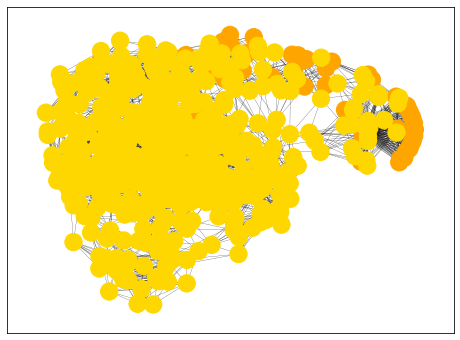

In [16]:
X=data[features]
A = kneighbors_graph(X, metric="hamming", n_neighbors=10).toarray()
plt.figure(figsize=(8,6)) 
colores = [ "gold" if clase==0 else "orange" for clase in Y]
G=nx.from_numpy_matrix(A, create_using=nx.Graph())
for id,node in G.nodes(data=True):
    node["name"]=id+1
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
nx.draw_networkx_nodes(G, node_color=colores,pos=pos)
labels = nx.get_node_attributes(G, 'name') 
nx.draw_networkx_edges(G,pos=pos,width=0.2,edge_color="black")

In [17]:
grafo=[]
for nodes in nx.connected_components(G):
    print(nodes)
    grafo.append(G.subgraph(nodes).copy())
len(grafo)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

1

In [18]:
A=nx.to_numpy_matrix(G)
D = np.diag(A.sum(axis=1).flatten().tolist()[0])
L = D-A;
D=torch.from_numpy(D)
L=torch.from_numpy(L)
A=torch.from_numpy(A)

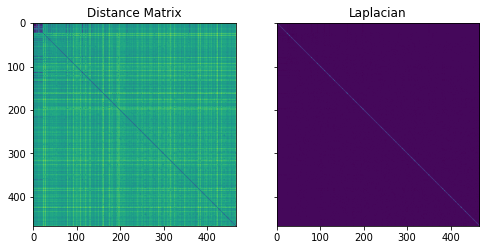

In [19]:
def distance_matrix(mat):
    d= ((mat.unsqueeze (0)-mat.unsqueeze (1))**2).sum (2)**0.5
    return d
d= distance_matrix(A)
fig,ax=plt.subplots(1,2,sharex='all',sharey="all");
fig.set_size_inches(8,4)
ax[0].set_title("Distance Matrix")
ax[0].imshow(d.numpy());
ax[1].set_title("Laplacian")
ax[1].imshow(L.numpy());

In [20]:
from sklearn import cluster
spectral = cluster.SpectralClustering(
    n_clusters=2,
    eigen_solver="arpack",
    affinity="nearest_neighbors",
)
grupos=spectral.fit_predict(X)

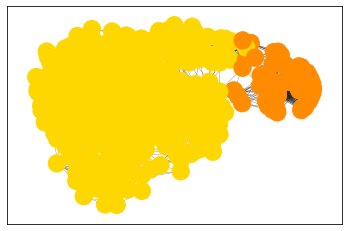

In [21]:
mapa = {0:"gold",1:"darkorange",2:"yellow",3:"tomato",4:"red"}
colores = [ mapa[grupo] for grupo in grupos]
G=nx.from_numpy_matrix(A.numpy(), create_using=nx.Graph())
for id,node in G.nodes(data=True):
    node["name"]=id+1
pos = nx.nx_agraph.graphviz_layout(G, prog="neato")
nx.draw_networkx_nodes(G, node_color=colores,pos=pos)
labels = nx.get_node_attributes(G, 'name') 
nx.draw_networkx_edges(G,pos=pos,width=0.2,edge_color="black")